<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [170]:
# Check for GPU
!nvidia-smi

Sat Oct 26 19:23:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.51.01              Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        On  |   00000000:01:00.0  On |                  N/A |
|  0%   55C    P8             17W /  200W |    1170MiB /  12282MiB |     17%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [171]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"

2.4.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

In [172]:
print("Medicine")
print("Video game industry")
print("Military")

Medicine
Video game industry
Military


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting happens whed model is too focused on training datasets. It fits the data not actual patterns in the data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [173]:
print("1. adding dropout layers")
print("2. reducing number of training epochs")
print("3. increasing the size of trainig dataset")

1. adding dropout layers
2. reducing number of training epochs
3. increasing the size of trainig dataset


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [174]:
import torchvision
from torchvision.transforms import ToTensor

training_dataset = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
testing_dataset = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())
training_dataset, testing_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [175]:
training_dataset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

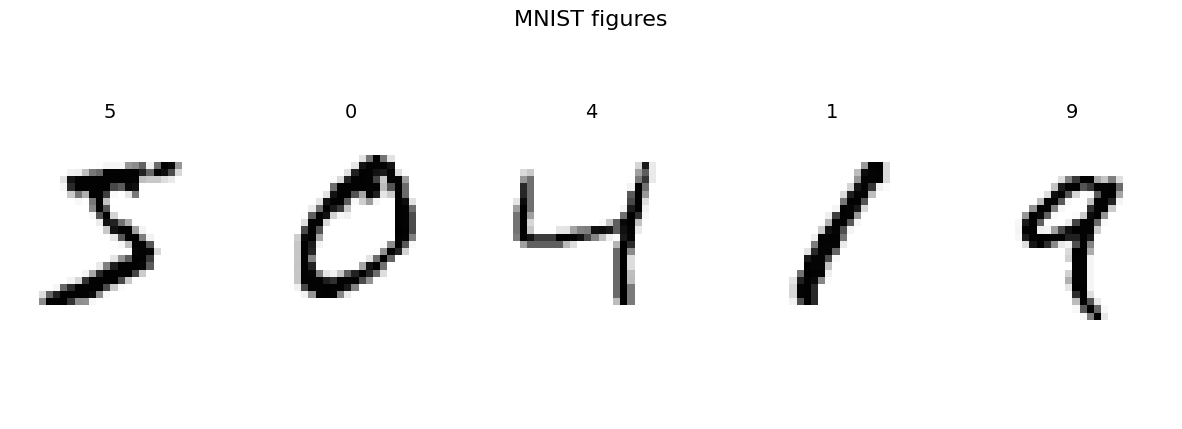

In [176]:
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.title("MNIST figures", fontsize=16)
plt.axis("off")
for i, (image, target) in enumerate(training_dataset):
    if i >= 5:
        break
    plt.subplot(1, 5, i+1)
    plt.title(target, fontsize=14)
    plt.imshow(image.squeeze().cpu(), cmap="Grays")
    plt.axis("off")

plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [177]:
from torch.utils.data import Dataset, DataLoader

train_dataloader = DataLoader(dataset=training_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=testing_dataset, batch_size=32, shuffle=False)
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [178]:
from torch import nn

class ConvModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.deep_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=392, out_features=1024),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=10),
        )
        
    def forward(self, x):
        return self.deep_layers(self.conv_layers(x))
    
    
model_0_gpu = ConvModelV2().to(device)
model_1_cpu = ConvModelV2()

In [179]:
first_batch = next(iter(train_dataloader))
sample = first_batch[0].to(device)
sample.shape, model_0_gpu(sample).shape

(torch.Size([32, 1, 28, 28]), torch.Size([32, 10]))

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [180]:
loss_fn_gpu = nn.CrossEntropyLoss().to(device)
loss_fn_cpu = nn.CrossEntropyLoss()

optimizer_0 = torch.optim.Adam(params=model_0_gpu.parameters(), lr=0.001)
optimizer_1 = torch.optim.Adam(params=model_1_cpu.parameters(), lr=0.001)

In [181]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

epochs = 5

gpu_start = timer()

loss = None

for epoch in tqdm(range(epochs)):
    for X, y in train_dataloader:
        X = X.to(device)
        y = y.to(device)
        logits = model_0_gpu(X)
        loss = loss_fn_gpu(input=logits, target=y)
        optimizer_0.zero_grad()
        loss.backward()
        optimizer_0.step()
       

gpu_end = timer()

# ---------------------------------------------------------------------

cpu_start = timer()

for epoch in tqdm(range(epochs)):
    for X, y in train_dataloader:
        logits = model_1_cpu(X)
        loss = loss_fn_cpu(input=logits, target=y)
        optimizer_1.zero_grad()
        loss.backward()
        optimizer_1.step()
        
cpu_end = timer()

print(f"time on gpu: {(gpu_end-gpu_start):.2f}")
print(f"time on cpu: {(cpu_end-cpu_start):.2f}")


100%|██████████| 5/5 [00:48<00:00,  9.65s/it]

time on gpu: 26.04
time on cpu: 43.39


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [182]:
preds = []

for X, y in test_dataloader:
    X = X.to(device)
    y = y.to(device)
    
    logits = model_0_gpu(X)
    preds.append(torch.argmax(torch.softmax(logits,dim=1),dim=1))
    
preds = torch.cat(preds)
preds.shape

torch.Size([10000])

In [183]:
import numpy as np

number_of_indexes = len(testing_dataset)
preds_array = preds.cpu().numpy()
data_array = testing_dataset.data.numpy()
targets_array = testing_dataset.targets.numpy()
len(preds_array), len(data_array)

(10000, 10000)

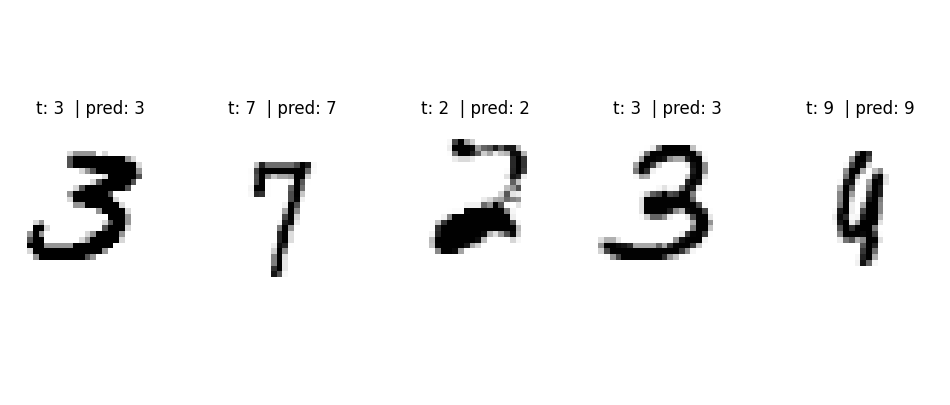

In [188]:
plt.figure(figsize=(12, 5))
plt.axis("off")
for num, i in enumerate(np.random.randint(0, number_of_indexes, size=5)):
    plt.subplot(1, 5, num+1)
    plt.title(f"t: {targets_array[i]}  | pred: {preds_array[i]}")
    plt.imshow(data_array[i], cmap="Grays")
    plt.axis("off")

plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [197]:
from torchmetrics.classification import MulticlassConfusionMatrix

matrix = MulticlassConfusionMatrix(num_classes=10)
matrix = matrix(preds.cpu(),testing_dataset.targets)
matrix


tensor([[ 965,    0,    3,    0,    0,    3,    8,    1,    0,    0],
        [   0, 1129,    0,    0,    0,    2,    2,    2,    0,    0],
        [   1,    1, 1015,    0,    1,    1,    0,    5,    8,    0],
        [   0,    0,    2,  993,    0,    8,    0,    2,    5,    0],
        [   0,    0,    0,    0,  967,    2,    1,    0,    1,   11],
        [   0,    0,    0,    4,    0,  885,    1,    1,    1,    0],
        [   4,    2,    0,    0,    4,    3,  943,    0,    2,    0],
        [   0,    1,    2,    0,    0,    0,    0, 1023,    1,    1],
        [   0,    0,    2,    1,    0,    1,    0,    2,  964,    4],
        [   0,    0,    0,    6,    2,   13,    0,    4,    2,  982]])

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


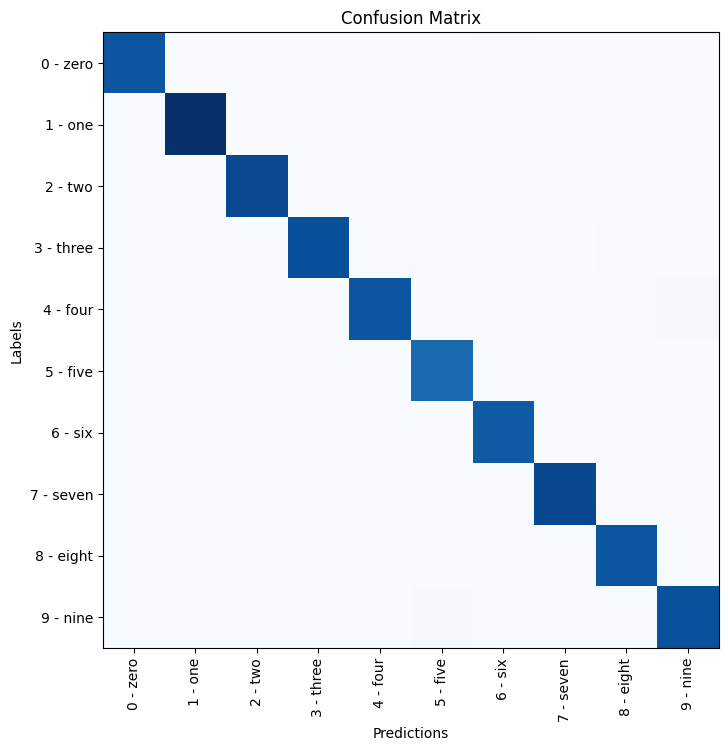

In [220]:
classes = testing_dataset.classes
print(classes)

plt.figure(figsize=(8,8))
plt.title("Confusion Matrix")
plt.imshow(matrix, cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("Labels")
plt.xticks(range(10), classes, rotation="vertical")
plt.yticks(range(10), classes)
plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?